Importing Libraries and Dependencies

In [2]:
pip install wordcloud

  Using cached wordcloud-1.9.2-cp39-cp39-win_amd64.whl (153 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Torch_Env\TorchEnv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install gensim

  Using cached gensim-4.3.2-cp39-cp39-win_amd64.whl (24.0 MB)
  Using cached smart_open-6.4.0-py3-none-any.whl (57 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Torch_Env\TorchEnv\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Torch_Env\TorchEnv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
import math
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import gensim
import string
import tensorflow as tf

Reading Data 

In [3]:
train = pd.read_csv(r"C:/Users/Rohan/Documents/Research/Other/Natural Language Processing/train/train.csv")
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [4]:
test = pd.read_csv(r"C:/Users/Rohan/Documents/Research/Other/Natural Language Processing/test/test.csv")
test.head()

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [6]:
train.isnull().sum()

id                                           0
target                                       0
comment_text                                 3
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97320 entries, 0 to 97319
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            97320 non-null  int64 
 1   comment_text  97320 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [8]:
train = train.drop(["id"], axis=1)

In [9]:
test = test.drop(["id"], axis=1)

In [10]:
print("Train and test shape: {} {}".format(train.shape, test.shape))

Train and test shape: (1804874, 44) (97320, 1)


Exploratory Data Analysis

1. Target Feature


C:\Users\Rohan\AppData\Local\Temp\ipykernel_20196\3555275233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['target'], kde=True, hist=False, bins=150, label='target')


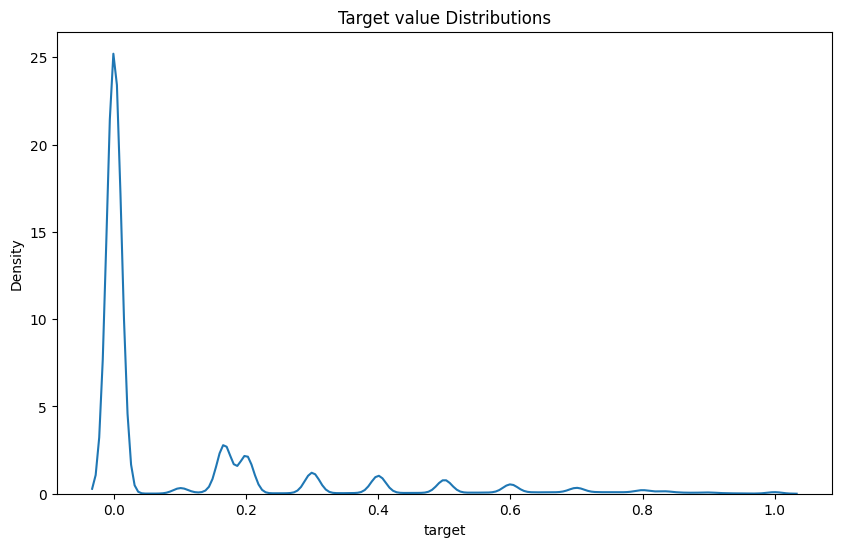

In [12]:
plt.figure(figsize=(10,6))
plt.title("Target value Distributions")
sns.distplot(train['target'], kde=True, hist=False, bins=150, label='target')
plt.show()

In [13]:
temp = train['target'].apply(lambda x: "non-toxic" if x < 0.5 else "toxic")    

In [14]:
import matplotlib.patches as mpatches

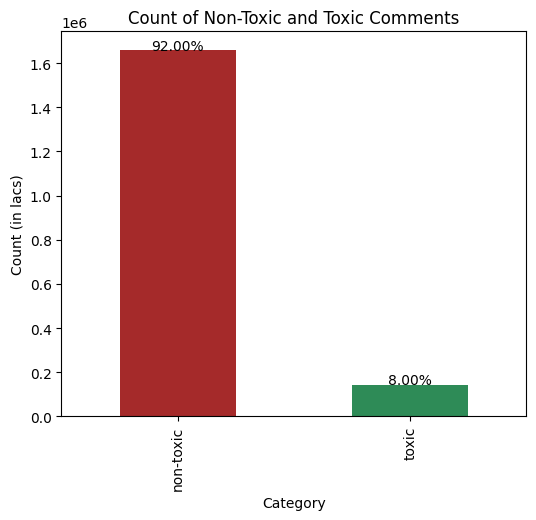

In [32]:
data = pd.DataFrame({'target': temp})
total = float(len(temp))

fig, ax = plt.subplots(figsize=(6, 5))
data['target'].value_counts().plot(kind='bar', color=['brown', 'seagreen'])
ax.set_xlabel('Category')
ax.set_ylabel('Count (in lacs)')
ax.set_title('Count of Non-Toxic and Toxic Comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
plt.show()

2. Toxicity Subtype Features:

    1. severe_toxicity,
    2. obscene,
    3. threat,
    4. insult,
    5. identity_attack

In [30]:
def plot_features_distribution(features, title, data):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        sns.distplot(data[feature],kde=True,hist=False, bins=100, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

C:\Users\Rohan\AppData\Local\Temp\ipykernel_20196\502313136.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],kde=True,hist=False, bins=100, label=feature)
C:\Users\Rohan\AppData\Local\Temp\ipykernel_20196\502313136.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

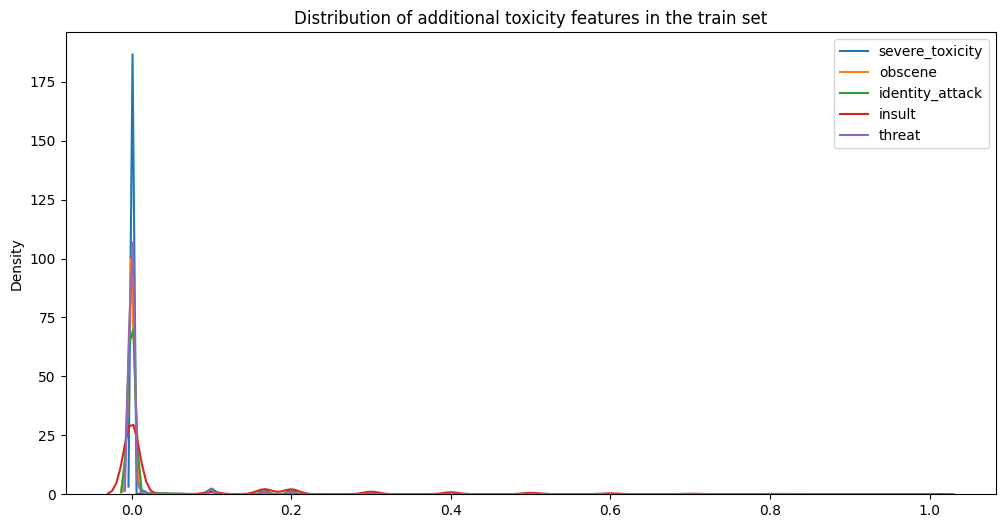

In [31]:
features = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']
plot_features_distribution(features, "Distribution of additional toxicity features in the train set", train)

C:\Users\Rohan\AppData\Local\Temp\ipykernel_20196\502313136.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],kde=True,hist=False, bins=100, label=feature)
C:\Users\Rohan\AppData\Local\Temp\ipykernel_20196\502313136.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

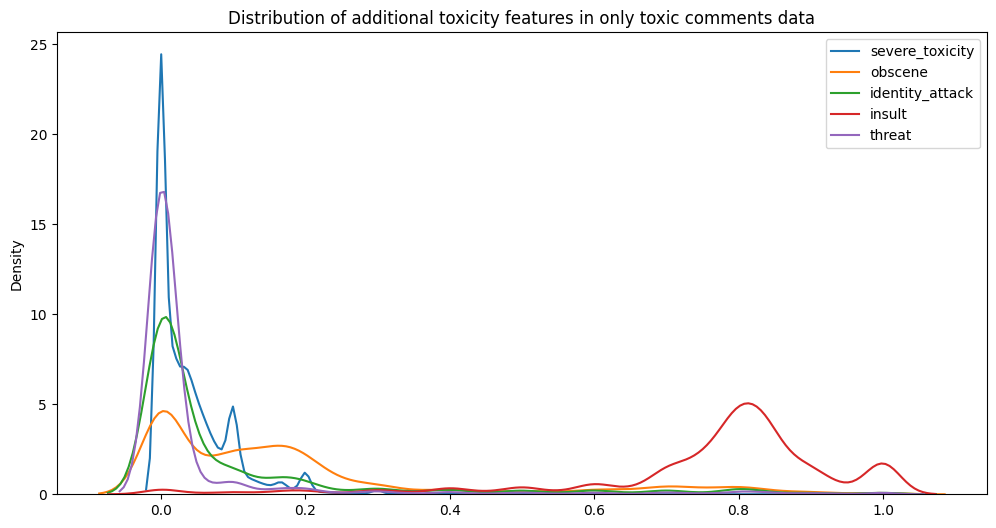

In [33]:
temp = train[train['target'] > 0.75]
plot_features_distribution(features, "Distribution of additional toxicity features in only toxic comments data", temp)

In [34]:
def get_comment_nature(row):
    # Extract type of toxic comment
    row = [row['severe_toxicity'], row['obscene'], row['identity_attack'], row['insult'], row['threat']]
    
    maxarg = np.argmax(np.array(row)) # Get the max value index.
    
    if maxarg == 0: return 'severe_toxicity'
    elif maxarg == 1: return 'obscene'
    elif maxarg == 2: return 'identity_attack'
    elif maxarg == 3: return 'insult'
    else: return 'threat'

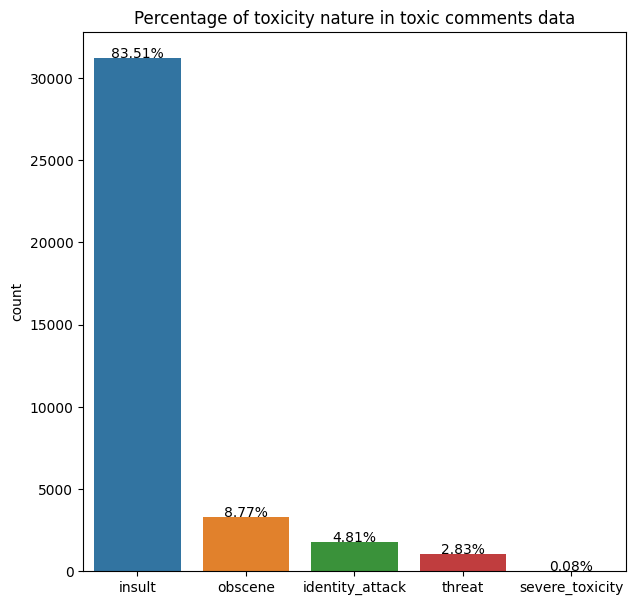

In [35]:
x = temp.apply(get_comment_nature, axis=1)  # Get nature of each toxic comment
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
total = float(len(x))

# Plot the count plot
sns.countplot(x=x, ax=ax)
ax.set_title('Percentage of toxicity nature in toxic comments data')

# Get the height and calculate percentage then display it on the plot itself

for p in ax.patches:
    # Get height
    height = p.get_height()

    # Plot at appropriate position
    ax.text(p.get_x() + p.get_width() / 2.0, height + 3, '{:1.2f}%'.format(100 * height / total), ha='center')

plt.show()

3. Identity Attributes:

    Sensitive topics:
    1. male
    2. female
    3. homosexual_gay_or_lesbian
    4. bisexual
    5. heterosexual
    6. christian
    7. jewish
    8. muslim
    9. black
    10. white
    11. asian
    12. latino

In [36]:
temp = train.dropna(axis = 0, how = 'any')

C:\Users\Rohan\AppData\Local\Temp\ipykernel_20196\502313136.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],kde=True,hist=False, bins=100, label=feature)
C:\Users\Rohan\AppData\Local\Temp\ipykernel_20196\502313136.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

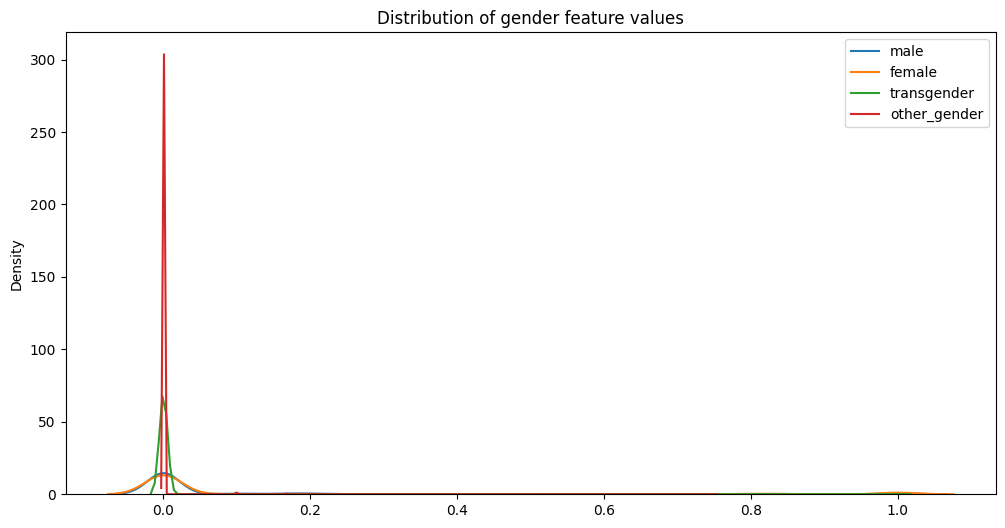

In [37]:
features = ['male', 'female', 'transgender', 'other_gender']
plot_features_distribution(features, "Distribution of gender feature values", temp)

C:\Users\Rohan\AppData\Local\Temp\ipykernel_20196\502313136.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],kde=True,hist=False, bins=100, label=feature)
C:\Users\Rohan\AppData\Local\Temp\ipykernel_20196\502313136.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

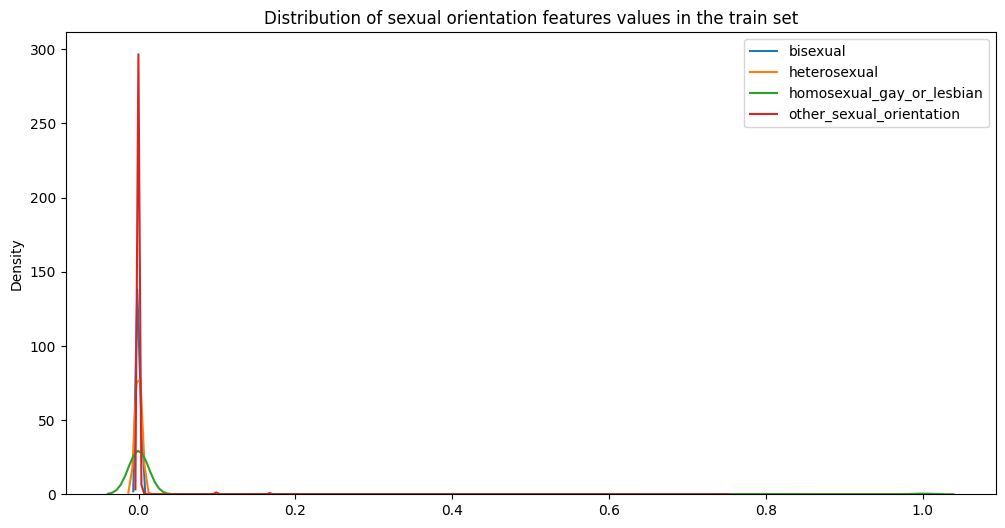

In [38]:
features = ['bisexual', 'heterosexual', 'homosexual_gay_or_lesbian', 'other_sexual_orientation']
plot_features_distribution(features, "Distribution of sexual orientation features values in the train set", temp)

C:\Users\Rohan\AppData\Local\Temp\ipykernel_21368\496200922.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],kde=True,hist=False, bins=240, label=feature)
C:\Users\Rohan\AppData\Local\Temp\ipykernel_21368\496200922.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

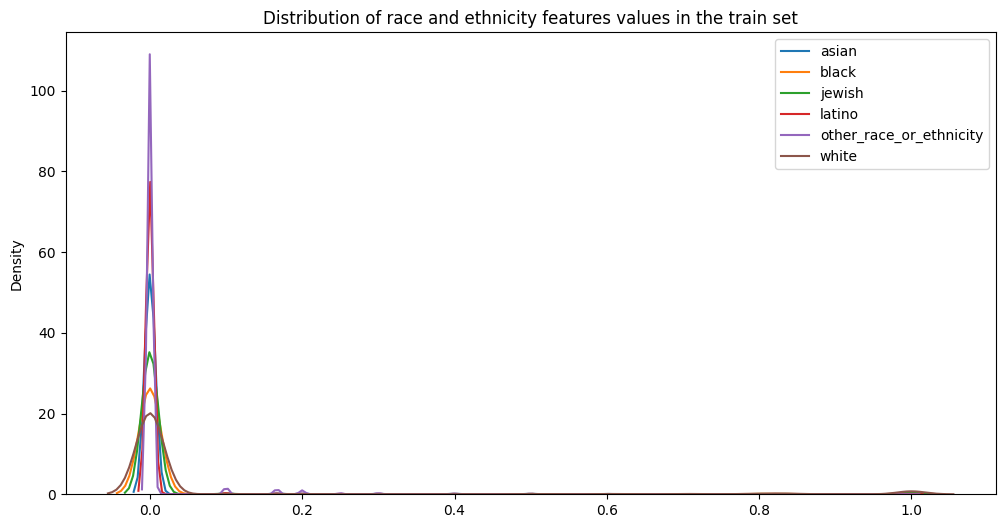

In [98]:
features = ['asian', 'black', 'jewish', 'latino', 'other_race_or_ethnicity', 'white']
plot_features_distribution(features, "Distribution of race and ethnicity features values in the train set", temp)

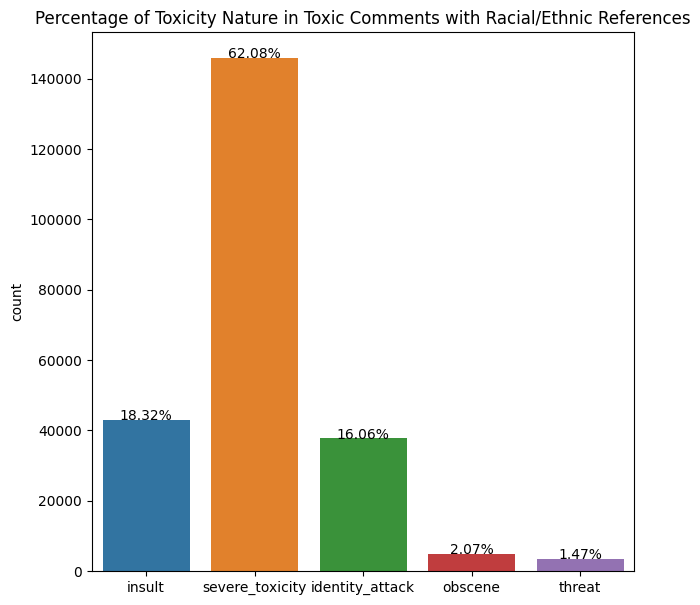

In [39]:
racial_references = (train['asian'] > 0.75) | (train['black'] > 0.75) | (train['jewish'] > 0.75) | (train['latino'] > 0.75) | (train['white'] > 0.75)

# Extract toxic comments with racial or ethnic references
toxic_comments = train[racial_references & (train['target'] > 0.5)]

# Get the nature of each toxic comment
x = temp.apply(get_comment_nature, axis=1)

# Plot the count of toxic comment natures
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(x=x, ax=ax)
ax.set_title('Percentage of Toxicity Nature in Toxic Comments with Racial/Ethnic References')

# Calculate and display percentages for each bar
total = float(len(x))
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2.0, height + 3, f'{percentage:.2f}%', ha='center')

plt.show()


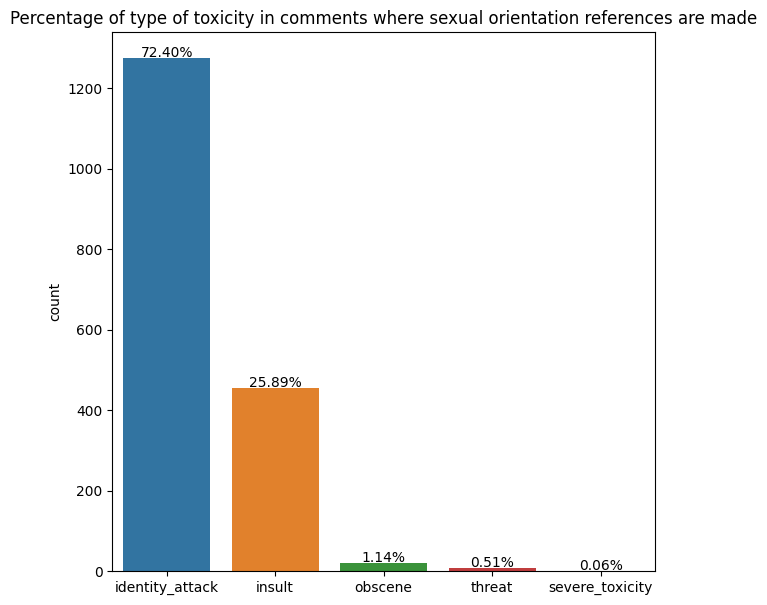

In [40]:
cond = (train['bisexual'] > 0.75) | (train['heterosexual'] > 0.75) | (train['homosexual_gay_or_lesbian'] > 0.75) | (train['other_sexual_orientation'] > 0.75) 
temp = train[cond] # Get data where race/ethnic references are made.
temp = temp[temp['target'] > 0.5] # Extract only toxic comments.

x = temp.apply(get_comment_nature, axis=1) # Get nature of each toxic comment

total = float(len(x))
  
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(x=x, ax=ax)
ax.set_title('Percentage of type of toxicity in comments where sexual orientation references are made')

# Calculate and display percentages for each bar
total = float(len(x))
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2.0, height + 3, f'{percentage:.2f}%', ha='center')
    
plt.show()

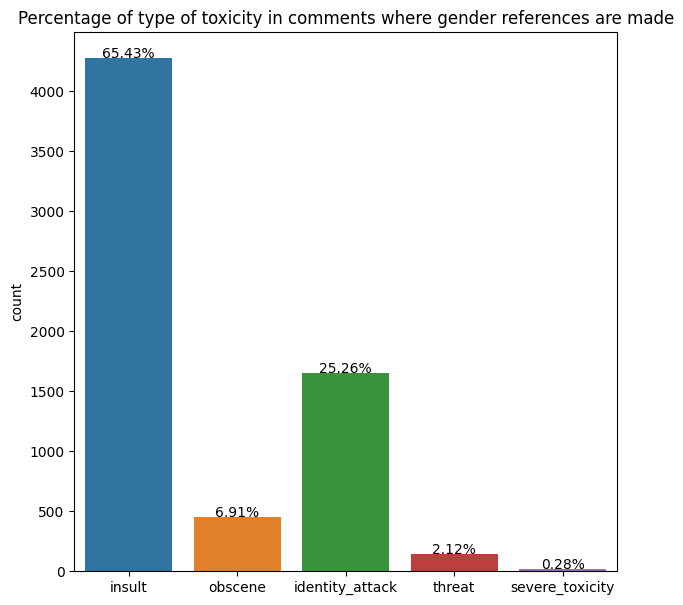

In [41]:
cond = (train['male'] > 0.75) | (train['female'] > 0.75) | (train['transgender'] > 0.75) | (train['other_gender'] > 0.75) 
temp = train[cond] # Get data where race/ethnic references are made.
temp = temp[temp['target'] > 0.5] # Extract only toxic comments.

x = temp.apply(get_comment_nature, axis=1) # Get nature of each toxic comment

fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(x=x, ax=ax)
ax.set_title('Percentage of type of toxicity in comments where gender references are made')

# Calculate and display percentages for each bar
total = float(len(x))
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2.0, height + 3, f'{percentage:.2f}%', ha='center')
    
plt.show()

4. Comment_Text Features

In [42]:
stpwrds = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stpwrds,
        max_words=100,
        max_font_size=30, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

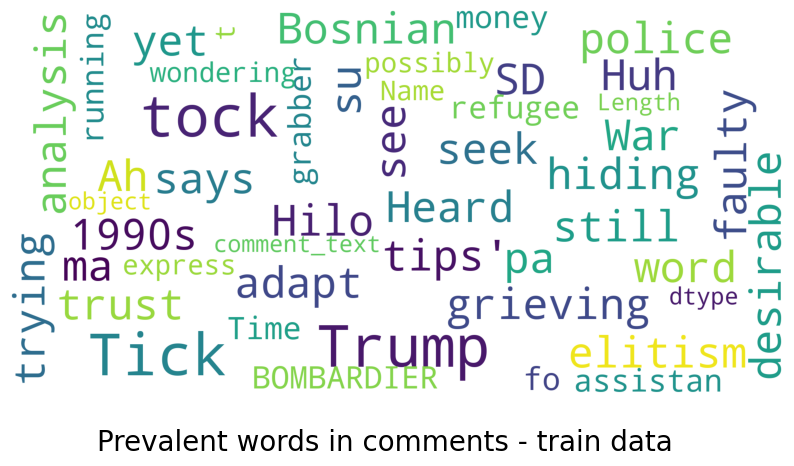

In [43]:
show_wordcloud(train['comment_text'].sample(20000), title = 'Prevalent words in comments - train data')

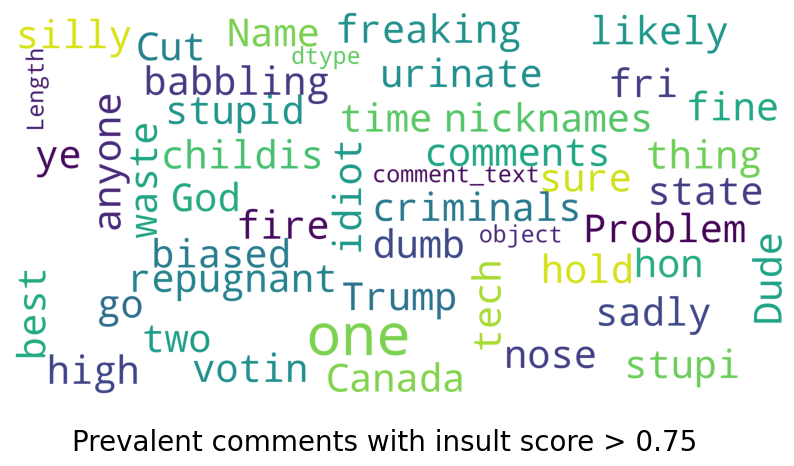

In [48]:
show_wordcloud(train.loc[train['insult'] > 0.75]['comment_text'].sample(20000), title = 'Prevalent comments with insult score > 0.75')

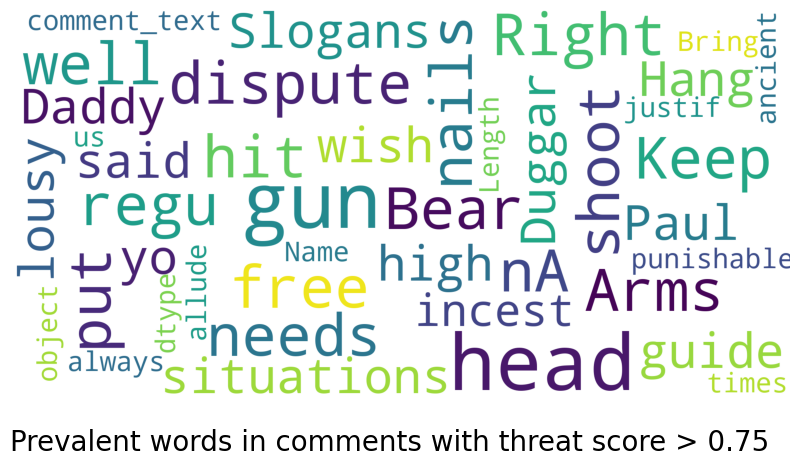

In [112]:
show_wordcloud(train.loc[train['threat'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with threat score > 0.75')

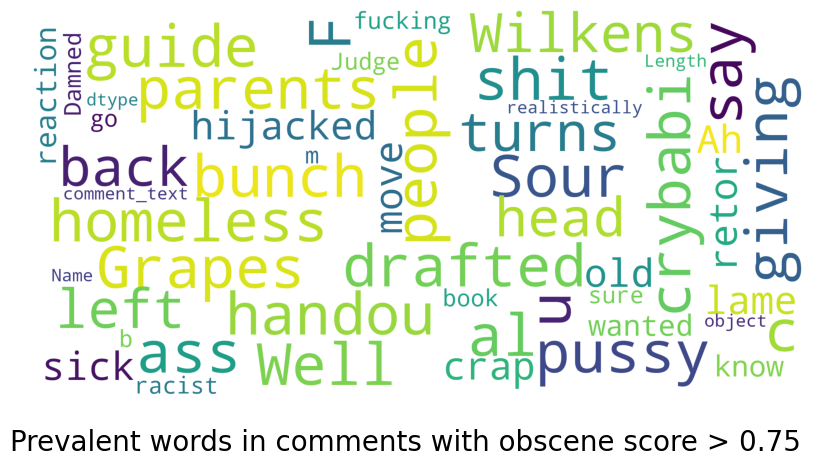

In [49]:
show_wordcloud(train.loc[train['obscene'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with obscene score > 0.75')

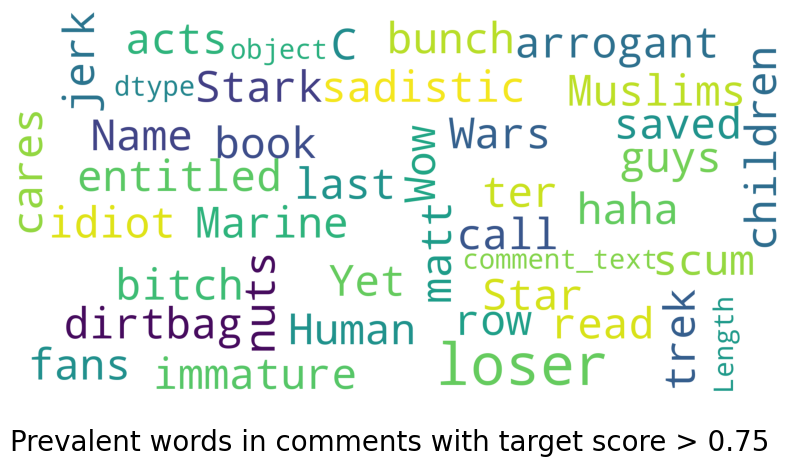

In [50]:
show_wordcloud(train.loc[train['target'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with target score > 0.75')

Pre-Prcoessing Text and Train-Test-Split

In [52]:
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
def preprocess(text_string):
    text_string = text_string.lower() # Convert everything to lower case.
    text_string = re.sub('[^A-Za-z0-9]+', ' ', text_string) # Remove special characters and punctuations
    
    x = text_string.split()
    new_text = []
    
    for word in x:
        if word not in stop_words:
            new_text.append(stemmer.stem(word))
            
    text_string = ' '.join(new_text)
    return text_string

In [53]:
def preprocess(text_string):
    if isinstance(text_string, str):
        text_string = text_string.lower()
    else:
        text_string = str(text_string)  # Convert non-string values to string
    text_string = re.sub('[^A-Za-z0-9]+', ' ', text_string)
    x = text_string.split()

    new_text = []
    for word in x:
        if word not in stop_words:
            new_text.append(stemmer.stem(word))

    text_string = ' '.join(new_text)
    return text_string


In [54]:
%%time
train['preprocessed_text'] = train['comment_text'].apply(preprocess)

CPU times: total: 2min 11s
Wall time: 7min 30s


In [55]:
train.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,preprocessed_text
0,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,cool like would want mother read realli great ...
1,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,thank would make life lot less anxieti induc k...
2,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,urgent design problem kudo take impress
3,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,someth abl instal site releas
4,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.0,4,47,haha guy bunch loser


In [56]:
%%time
test['preprocessed_text'] = test['comment_text'].apply(preprocess)

CPU times: total: 7.33 s
Wall time: 24.1 s


In [57]:
feature = train[['preprocessed_text']]
output = train[['target']]
X_train, X_cv, y_train, y_cv = train_test_split(feature, output)

print(X_train.shape)
print(X_cv.shape)
print(y_train.shape)
print(y_cv.shape)

(1353655, 1)
(451219, 1)
(1353655, 1)
(451219, 1)


In [58]:
X_train.head()

,preprocessed_text
1632874,danc want stain dem lib cannot wipe pig icon h...
1171636,cool like beer
1682319,one word describ sign dumb see someon cut top ...
278786,link show noth
1671602,neither draft dodger bill clinton


In [59]:
X_cv.head()

,preprocessed_text
961721,know get 50 50 stat hello men use major studen...
1051340,peter boot lol hypocrit hypocrit
906700,new intern stori globe mail websit morn two fa...
491908,pass beauti back countri earth one remain real...
1693118,better get late


In [60]:
X_test = test[['preprocessed_text']]
X_test.head()

,preprocessed_text
0,integr mean pay debt appli presid trump
1,malfeas administr board wast money
2,rmiller101 spoken like true elitist look bud a...
3,paul thank kind word inde strong belief hide b...
4,sorri miss high school eisenhow sent troop vie...


In [61]:
# Saving the files to csv so that we dont need to preprocess again.
X_train.to_pickle('X_train.pkl')
X_cv.to_pickle('X_cv.pkl')
X_test.to_pickle('X_test.pkl')
y_train.to_pickle('y_train.pkl')
y_cv.to_pickle('y_cv.pkl')

Training Model

In [62]:
X_train = pd.read_pickle('X_train.pkl')
X_cv = pd.read_pickle('X_cv.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_cv = pd.read_pickle('y_cv.pkl')

_Term Frequency - Inverse Document Frequency (TFIDF) Statistics_

In [63]:
tfidf_vec = TfidfVectorizer(ngram_range=(1,2), max_features=35000)
tfidf_train = tfidf_vec.fit_transform(X_train['preprocessed_text'])
tfidf_cv = tfidf_vec.transform(X_cv['preprocessed_text'])
tfidf_test = tfidf_vec.transform(X_test['preprocessed_text'])

print(tfidf_train.shape)
print(tfidf_cv.shape)
print(tfidf_test.shape)

(1353655, 35000)
(451219, 35000)
(97320, 35000)


1 SGDRegressor:

1.1 Hyperparameter Tuning:

In [64]:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(tfidf_train, y_train) # Train
        
        preds = model.predict(tfidf_train) # Get predictions
        err = mean_squared_error(y_train['target'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(tfidf_cv) # Get predictions on CV set
        err = mean_squared_error(y_cv['target'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

1e-05 l1 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.025437847707711864
Mean Squared Error on cv set:  0.025496430043972434
**************************************************
1e-05 l2 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.024049760194757974
Mean Squared Error on cv set:  0.024158282604192005
**************************************************
0.0001 l1 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.02989537996468607
Mean Squared Error on cv set:  0.029943556245537503
**************************************************
0.0001 l2 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.025172344074956988
Mean Squared Error on cv set:  0.025280355794349736
**************************************************
0.001 l1 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.03832798231855479
Mean Squared Error on cv set:  0.038415042945687254
**************************************************
0.001 l2 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.03019902004737001
Mean Squared Error on cv set:  0.03030157752407079
**************************************************
0.01 l1 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.03881989887347843
Mean Squared Error on cv set:  0.038895703021991156
**************************************************
0.01 l2 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.037176944142307974
Mean Squared Error on cv set:  0.037260092538830045
**************************************************
0.1 l1 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.038819882003473354
Mean Squared Error on cv set:  0.03889566816374239
**************************************************
0.1 l2 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.03863548266203861
Mean Squared Error on cv set:  0.03871221857931153
**************************************************
1 l1 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.0388198990375235
Mean Squared Error on cv set:  0.0388957032461496
**************************************************
1 l2 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.03880169735126237
Mean Squared Error on cv set:  0.03887755709790721
**************************************************
10 l1 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.0388198994671087
Mean Squared Error on cv set:  0.03889570383192514
**************************************************
10 l2 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.038817875086978024
Mean Squared Error on cv set:  0.03889368222067117
**************************************************
100 l1 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.0388198918299715
Mean Squared Error on cv set:  0.03889567143133247
**************************************************
100 l2 :


c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on train set:  0.03881977118190563
Mean Squared Error on cv set:  0.03889556817248068
**************************************************


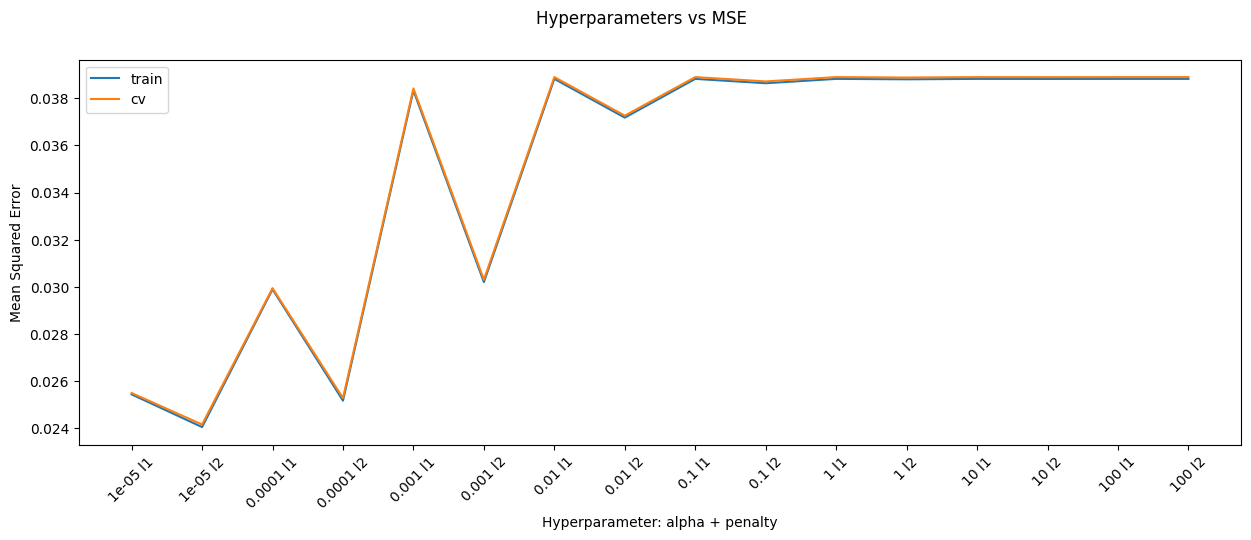

In [65]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(alpha) * len(penalty)), tr_errors)
plt.plot(range(len(alpha) * len(penalty)), cv_errors)
plt.legend(['train', 'cv'])
plt.xticks(range(len(alpha) * len(penalty)), xticks, rotation=45)
plt.xlabel('Hyperparameter: alpha + penalty')
plt.ylabel('Mean Squared Error')
plt.show()

1.2 Feature Importance:

In [66]:
# Printing the 20 most important features/words which contribute to a comment being toxic.
feat_names = tfidf_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]


,weights
stupid,1.569098
idiot,1.249951
fool,0.656023
ignor,0.607957
dumb,0.591518
pathet,0.584159
moron,0.567634
ridicul,0.558606
loser,0.558019
liar,0.520409


In [67]:
df.sort_values("weights", ascending=True).iloc[0:20,:]

,weights
thank,-0.096364
interest,-0.085094
stori,-0.079494
agre,-0.078834
great,-0.074436
may,-0.073382
good,-0.071693
new,-0.070747
work,-0.069069
issu,-0.069051


2 Decision Tree

2.1 Hyperparameter Tuning:

In [68]:
# Performing hyperparameter tuning:
max_depth = [3, 5, 7]
min_samples = [10, 100, 1000]
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for d in max_depth:
    for samp in min_samples:
        xticks.append("Depth- " + str(d) + ' Min Samples leaf-' + str(samp))
        print("Depth- " + str(d) + ' Min Samples leaf-' + str(samp) + " :")
        
        model = DecisionTreeRegressor(max_depth=d, min_samples_leaf=samp)
        model.fit(tfidf_train, y_train) # Train
        
        preds = model.predict(tfidf_train) # Get predictions
        err = mean_squared_error(y_train['target'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(tfidf_cv) # Get predictions on CV set
        err = mean_squared_error(y_cv['target'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

Depth- 3 Min Samples leaf-10 :
Mean Squared Error on train set:  0.032905076578477334
Mean Squared Error on cv set:  0.03289736434909762
**************************************************
Depth- 3 Min Samples leaf-100 :
Mean Squared Error on train set:  0.032905076578477334
Mean Squared Error on cv set:  0.03289736434909762
**************************************************
Depth- 3 Min Samples leaf-1000 :
Mean Squared Error on train set:  0.032905076578477334
Mean Squared Error on cv set:  0.032897364349097624
**************************************************
Depth- 5 Min Samples leaf-10 :
Mean Squared Error on train set:  0.0317786037474556
Mean Squared Error on cv set:  0.03173912390576513
**************************************************
Depth- 5 Min Samples leaf-100 :
Mean Squared Error on train set:  0.03177997072640533
Mean Squared Error on cv set:  0.03173820577308199
**************************************************
Depth- 5 Min Samples leaf-1000 :
Mean Squared Error on tra

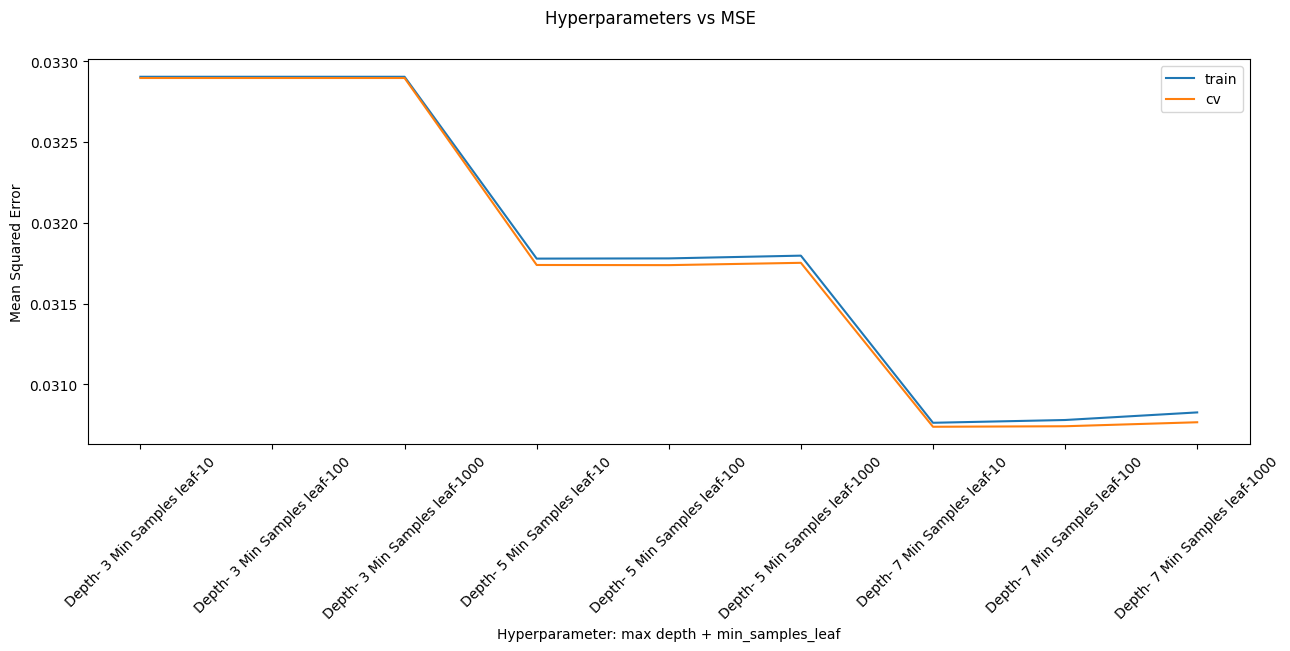

In [69]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(max_depth) * len(min_samples)), tr_errors)
plt.plot(range(len(max_depth) * len(min_samples)), cv_errors)
plt.legend(['train', 'cv'])
plt.xticks(range(len(max_depth) * len(min_samples)), xticks, rotation=45)
plt.xlabel('Hyperparameter: max depth + min_samples_leaf')
plt.ylabel('Mean Squared Error')
plt.show()

2.2 Feature Importance:

In [70]:
weights = best_model.feature_importances_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
stupid,0.408500
idiot,0.263543
pathet,0.071372
fool,0.070981
moron,0.063676
white,0.058545
hypocrit,0.053478
racist,0.005463
ignor,0.000737
fool peopl,0.000657


- _SGDRegressor:_
    - Hyperparameters Tuned Values: learning_rate(alpha): 0.00001 and penalty: l2
    - Train MSE Loss: 0.02404
    - CV MSE Loss: 0.02415  
- _Decision Tree:_
    - Hyperparameters Tuned Values: max_depth: 7 and min_samples_leaf: 10
    - Train MSE Loss: 0.03076
    - CV MSE Loss: 0.03073